In [1]:
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
import pydotplus
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [2]:
df = pandas.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
d1 = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(d1)
d2 = {'C': 0, 'Q': 1, 'S': 2}
df['Embarked'] = df['Embarked'].map(d2)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
features = ['Sex', 'Age', 'SibSp','Embarked','Pclass']
X = df[features]

In [6]:
y = df['Survived']

In [7]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

C:\Users\Xiomara Ordoñez\AppData\Local\Temp\ipykernel_3780\1045576195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
print(X, y, sep='\n\n')

     Sex   Age  SibSp  Embarked  Pclass
0      0  22.0      1       2.0       3
1      1  38.0      1       0.0       1
2      1  26.0      0       2.0       3
3      1  35.0      1       2.0       1
4      0  35.0      0       2.0       3
..   ...   ...    ...       ...     ...
886    0  27.0      0       2.0       2
887    1  19.0      0       2.0       1
888    1   0.0      1       2.0       3
889    0  26.0      0       0.0       1
890    0  32.0      0       1.0       3

[891 rows x 5 columns]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [10]:
dtree = DecisionTreeClassifier(max_leaf_nodes=7,random_state=0)
dtree = dtree.fit(X, y)

In [11]:
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

True

<IPython.core.display.Javascript object>


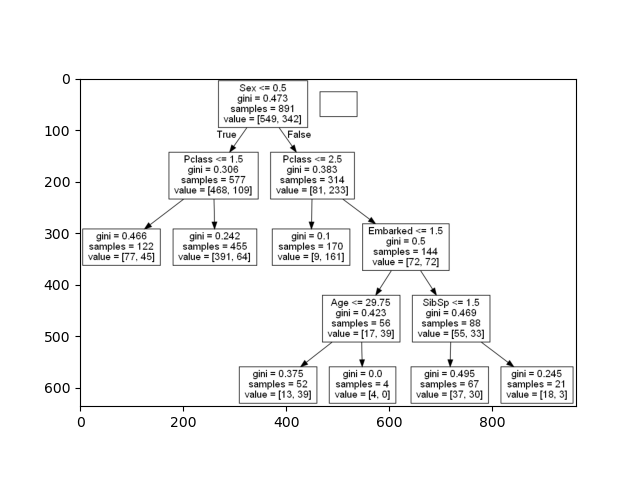

In [12]:
img = pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=75)

In [16]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
y_pred = clf.predict(X_test)
print(y_pred)
print(y_pred.shape)

[0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0
 0 1 1 0 0 0 1 0 0]
(268,)


In [19]:
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Presicion: ", metrics.precision_score(y_test, y_pred))
'''Sensibilidad: que porcentaje de tuplas positivas están etiquetados como tales'''
print("Sensibilidad ", metrics.recall_score(y_test, y_pred))

Exactitud:  0.7611940298507462
Presicion:  0.6790123456790124
Sensibilidad  0.5913978494623656


In [21]:
'''Matriz de confusión'''
confusion_matrix(y_test, y_pred)

array([[149,  26],
       [ 38,  55]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>


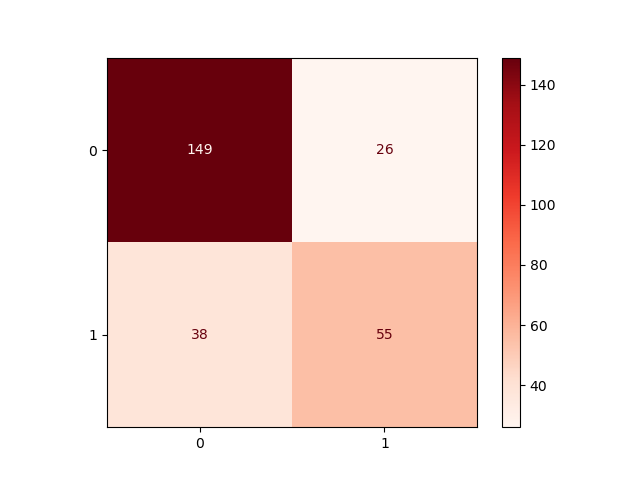

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (891).

In [22]:
class_names = df.Survived
titles_options = [("Matriz de Confusión", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()